# 🚗 Car Sales Data Visualization

This notebook contains all the data viualizaion plots.

In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importing the dataset
df = pd.read_csv("../data/car-sales.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
df.describe()

,Odometer (KM),Doors,Price
count,950.000000,950.000000,950.000000
mean,131253.237895,4.011579,16042.814737
std,69094.857187,0.382539,8581.695036
min,10148.000000,3.000000,2796.000000
25%,70391.250000,4.000000,9529.250000
50%,131821.000000,4.000000,14297.000000
75%,192668.500000,4.000000,20806.250000
max,249860.000000,5.000000,52458.000000


In [5]:
# Checking the datatypes
df.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [6]:
# Checking whether the dataframe has null values
df.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

As the data seems to be missing, we need to preprocess the data so that it doesn't have any missing values and is ready for visualization.

## Importing the Preprocessed Dataset

In [7]:
df = pd.read_csv("../data/car-sales-remastered.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
897,BMW,Blue,163322.0,3.0,31666.0
898,Toyota,Black,35820.0,4.0,32042.0
899,Nissan,Blue,66604.0,4.0,31570.0
900,Honda,White,215883.0,4.0,4001.0


In [23]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [45]:
plt.style.use('seaborn-whitegrid')

In [18]:
made_by = df["Make"].value_counts().reset_index()
made_by

,index,Make
0,Toyota,363
1,Honda,270
2,Nissan,177
3,BMW,92


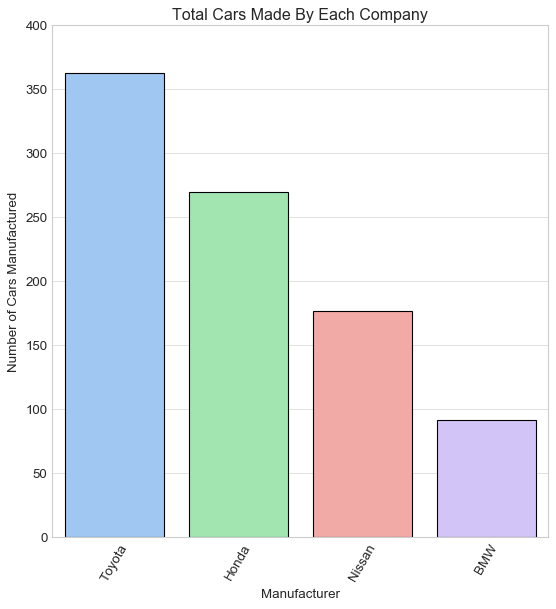

In [56]:
plt.figure(figsize = (8,8))
sns.barplot(x = "index", y = "Make", data = made_by, ci = None).set_title("Total Cars Made By Each Company")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars Manufactured")
plt.xticks(rotation = 60);

In [51]:
color = df["Colour"].value_counts().reset_index()
color

,index,Colour
0,White,365
1,Blue,287
2,Black,91
3,Red,86
4,Green,73


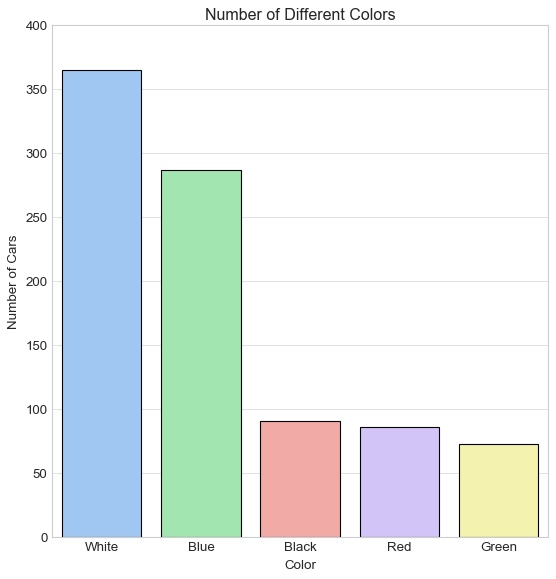

In [67]:
plt.figure(figsize = (8,8))
sns.barplot(x = "index", y = "Colour", data = color).set_title("Number of Different Colors")
plt.xlabel("Color")
plt.ylabel("Number of Cars");

In [86]:
make_vs_price = df[["Make", "Price"]]
make_vs_price

,Make,Price
0,Honda,15323.0
1,BMW,19943.0
2,Honda,28343.0
3,Toyota,13434.0
4,Nissan,14043.0
...,...,...
897,BMW,31666.0
898,Toyota,32042.0
899,Nissan,31570.0
900,Honda,4001.0


In [87]:
make_vs_price = make_vs_price.groupby(by = "Make").mean().reset_index()
make_vs_price.head()

,Make,Price
0,BMW,26215.913043
1,Honda,14582.855556
2,Nissan,13867.062147
3,Toyota,15663.201102


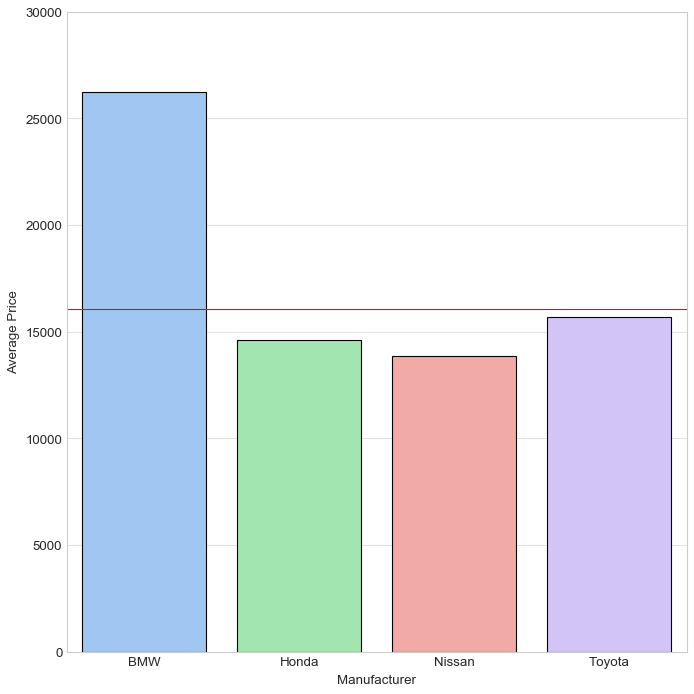

In [122]:
mean_price = df["Price"].mean()
plt.figure(figsize = (10, 10))
sns.barplot(x = "Make", y = "Price", data = make_vs_price)
plt.xlabel("Manufacturer")
plt.ylabel("Average Price");
mean_price = df["Price"].mean()
plt.axhline(mean_price, color = "red");

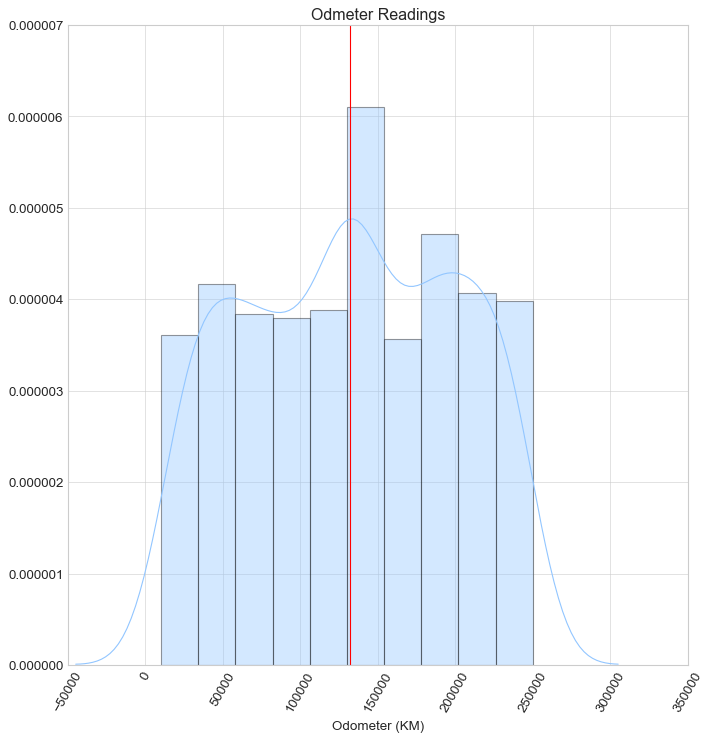

In [114]:
plt.figure(figsize = (10,10))
avg = df["Odometer (KM)"].mean()
sns.distplot(df["Odometer (KM)"]).set_title("Odmeter Readings")
plt.axvline(avg, color = "red")
plt.xticks(rotation=60);

In [108]:
price_vs_odo = df[["Price", "Odometer (KM)"]]
price_vs_odo

,Price,Odometer (KM)
0,15323.0,35431.0
1,19943.0,192714.0
2,28343.0,84714.0
3,13434.0,154365.0
4,14043.0,181577.0
...,...,...
897,31666.0,163322.0
898,32042.0,35820.0
899,31570.0,66604.0
900,4001.0,215883.0


In [109]:
price_vs_odo = price_vs_odo.groupby(by = "Odometer (KM)").mean().reset_index()

In [110]:
price_vs_odo

,Odometer (KM),Price
0,10148.0,27337.0
1,10217.0,22883.0
2,10247.0,32566.0
3,10953.0,16636.0
4,10954.0,30439.0
...,...,...
851,248634.0,9919.0
852,248736.0,8358.0
853,248815.0,9785.0
854,248899.0,5834.0


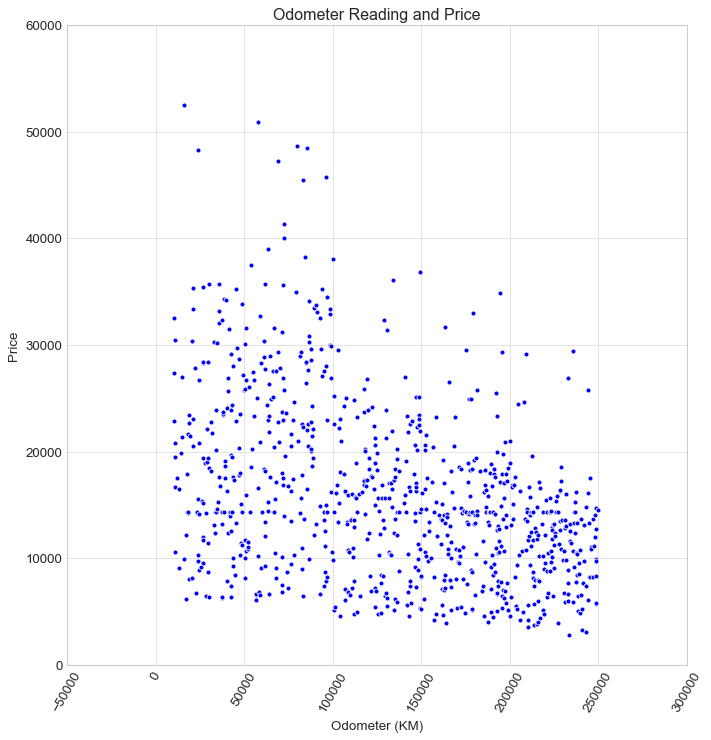

In [119]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = "Odometer (KM)", y = "Price", data = price_vs_odo).set_title("Odometer Reading and Price")
plt.xticks(rotation = 60);